# AMCAT ANALYSIS

## INTRODUCTION : 

The dataset consists of employment outcomes for engineering graduates, including their salaries, job titles, and job locations. It contains demographic information such as gender, education details, and standardized scores in cognitive, technical, and personality skills. With approximately 40 independent variables (both continuous and categorical) and 4000 data points, the dataset provides a comprehensive view of factors that may influence employment outcomes for these graduates.

The objective of this analysis is to explore and identify the key factors that influence salary outcomes for engineering graduates. By conducting an in-depth exploratory data analysis, we aim to uncover significant patterns and relationships between demographic, academic, and skill-based variables and the target variable, salary.

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Data Import and Overview
path = "D:/DATA/AMCAT.csv"
df = pd.read_csv(path)
df.head(10)

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
5,train,1027655,300000.0,6/1/14 0:00,present,system engineer,Hyderabad,m,7/2/92 0:00,89.92,...,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608
6,train,947847,300000.0,8/1/14 0:00,5/1/15 0:00,java software engineer,Banglore,m,2/1/93 0:00,86.08,...,346,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.00920,-1.0872
7,train,912934,400000.0,7/1/14 0:00,7/1/15 0:00,mechanical engineer,Bangalore,m,5/27/92 0:00,92.00,...,-1,469,-1,-1,-1,-0.0154,1.2114,0.0100,0.14590,1.2470
8,train,552574,600000.0,7/1/13 0:00,present,electrical engineer,Noida,m,9/17/91 0:00,90.00,...,-1,-1,-1,-1,-1,-0.1590,0.5454,-0.6048,-0.74150,-0.2859
9,train,1203363,230000.0,7/1/14 0:00,present,project engineer,Kolkata,m,6/13/93 0:00,77.00,...,-1,-1,-1,-1,-1,-1.3080,0.5454,-0.9122,0.90660,0.0973


In [4]:
#droping unwanted column "unnamed"
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [5]:
df.shape

(3998, 38)

In [6]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [7]:
df.isna().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

In [9]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [10]:
df.columns = df.columns.str.strip()

In [11]:
df.duplicated().sum()

0

## UNIVARIATE ANALYSIS

### salary column - target variable

In [12]:
# understanding the target Variable "salary"
def numerical_univariate(num_data):
  for col_name in num_data:
    print('*'*10, col_name , '*'*10)
    print(num_data[col_name].agg(['min','max','mean','median','std','skew','kurt']))
    print()

In [13]:
numerical_univariate(df[['Salary']])

********** Salary **********
min       3.500000e+04
max       4.000000e+06
mean      3.076998e+05
median    3.000000e+05
std       2.127375e+05
skew      6.451081e+00
kurt      8.093000e+01
Name: Salary, dtype: float64



<Axes: >

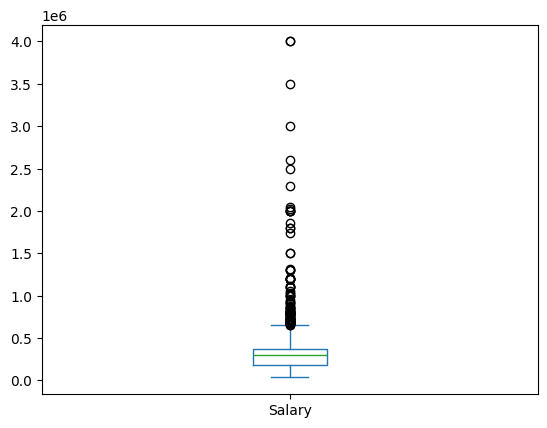

In [14]:
df['Salary'].plot(kind = 'box')

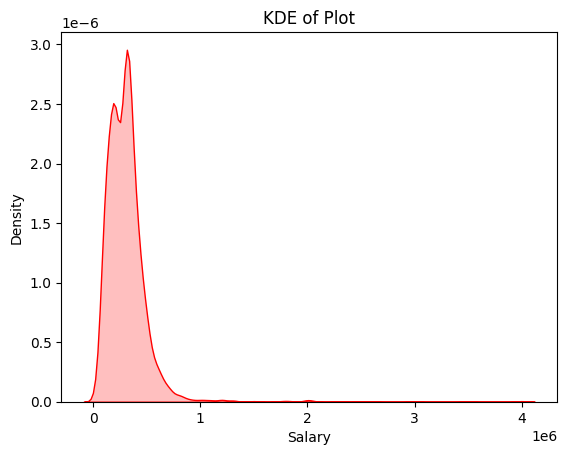

In [15]:
sns.kdeplot(df['Salary'],fill = True, color = 'red')
plt.title('KDE of Plot')
plt.show()

The box plot shows significant outliers in the salary data, with most salaries concentrated below 5 lakhs and a few salaries going beyond 10 lakhs. The KDE plot further confirms a right-skewed distribution, where the majority of salaries fall between 0 and 5 lakhs, while a small number of higher salaries are pulling the distribution towards the right.

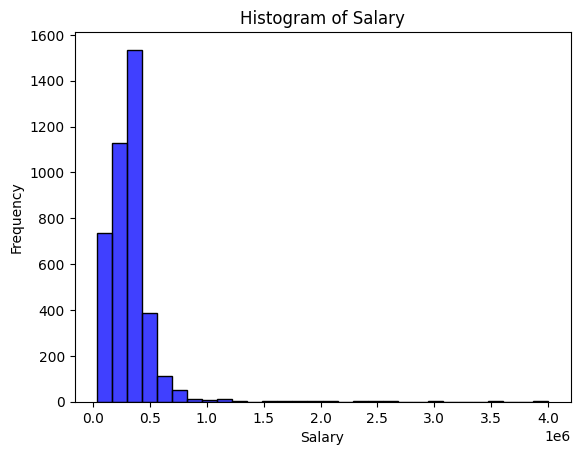

In [16]:
sns.histplot(df['Salary'], bins=30, kde=False, color='blue')
plt.title('Histogram of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

### Understanding the distribution of Gender

In [17]:
df['Gender'].value_counts()

Gender
m    3041
f     957
Name: count, dtype: int64

<Axes: xlabel='Gender'>

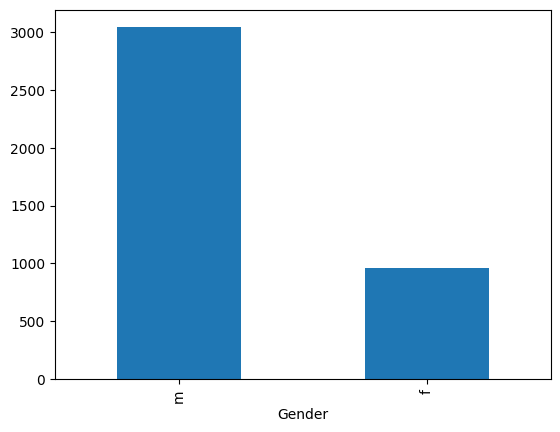

In [18]:
df['Gender'].value_counts().plot(kind = 'bar')

From this, it is very clear that males pursue higher studies more than females.

### Analyzing the most common job positions

In [19]:
df['Designation'].nunique()

419

In [20]:
top_10_designations = df['Designation'].value_counts().nlargest(10)
top_10_designations

Designation
software engineer             539
software developer            265
system engineer               205
programmer analyst            139
systems engineer              118
java software engineer        111
software test engineer        100
project engineer               77
technical support engineer     76
senior software engineer       72
Name: count, dtype: int64

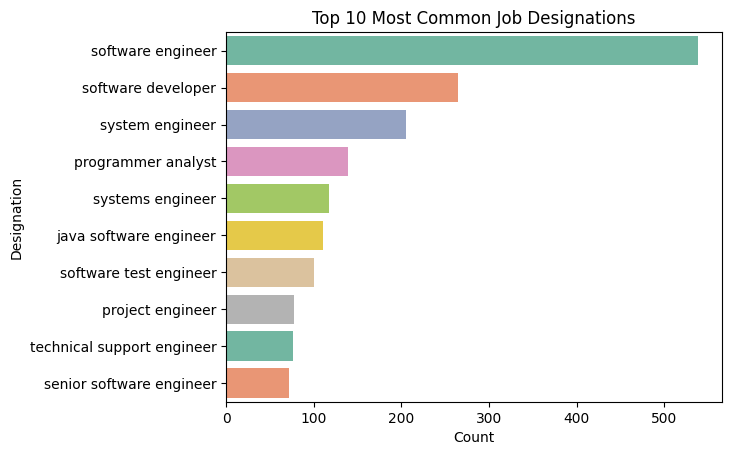

In [21]:
sns.barplot(x=top_10_designations.values, y=top_10_designations.index, hue=top_10_designations.index, palette='Set2', dodge=False, legend=False)
plt.title('Top 10 Most Common Job Designations')
plt.xlabel('Count')
plt.ylabel('Designation')
plt.show()

students pursing software engineer or we can say students getting placed into software engineer roles are more compared to other job designations

### Analyzing the most common job locations

In [22]:
df['JobCity'].nunique()

339

In [23]:
top_10_locations = df['JobCity'].value_counts().nlargest(10)
top_10_locations

JobCity
Bangalore    627
-1           461
Noida        368
Hyderabad    335
Pune         290
Chennai      272
Gurgaon      198
New Delhi    196
Mumbai       108
Kolkata       98
Name: count, dtype: int64

In [24]:
top_10_locations = top_10_locations[top_10_locations.index != '-1']

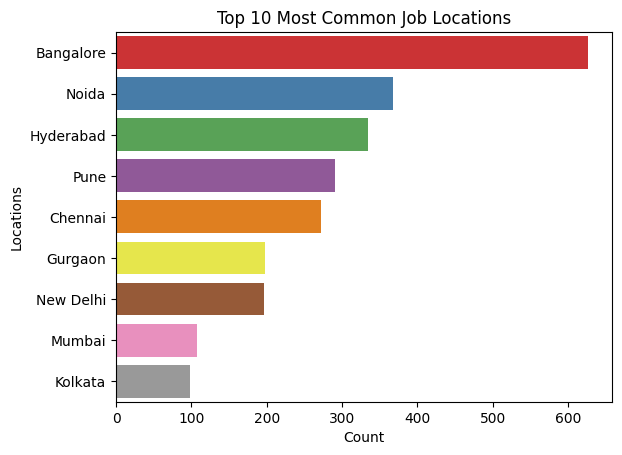

In [25]:
sns.barplot(x=top_10_locations.values, y=top_10_locations.index, hue=top_10_locations.index, palette='Set1', dodge=False, legend=False)
plt.title('Top 10 Most Common Job Locations')
plt.xlabel('Count')
plt.ylabel('Locations')
plt.show()

Bangalore is the most common job location, significantly leading over other cities

### Analyzing the most common specialization among students

In [26]:
df['Specialization'].nunique()

46

In [27]:
top_specializations = df['Specialization'].value_counts().nlargest(10)
top_specializations

Specialization
electronics and communication engineering    880
computer science & engineering               744
information technology                       660
computer engineering                         600
computer application                         244
mechanical engineering                       201
electronics and electrical engineering       196
electronics & telecommunications             121
electrical engineering                        82
electronics & instrumentation eng             32
Name: count, dtype: int64

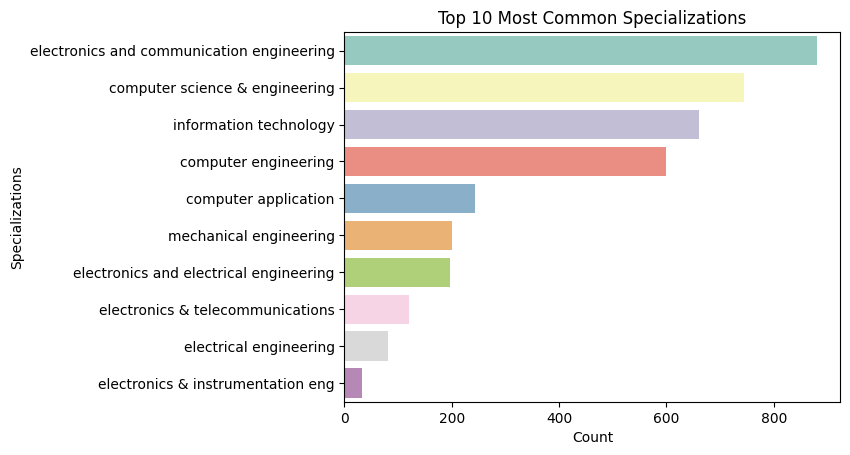

In [28]:
sns.barplot(x=top_specializations.values, y=top_specializations.index, hue=top_specializations.index, palette='Set3', dodge=False, legend=False)
plt.title('Top 10 Most Common Specializations')
plt.xlabel('Count')
plt.ylabel('Specializations')
plt.show()

The most common specialization among students is Electronics and Communication Engineering, with 880 students, followed by Computer Science & Engineering with 744 students.

#### Statistical Analysis of the marks column of students

In [29]:
numerical_univariate(df[['10percentage','12percentage','collegeGPA']])

********** 10percentage **********
min       43.000000
max       97.760000
mean      77.925443
median    79.150000
std        9.850162
skew      -0.591019
kurt      -0.110284
Name: 10percentage, dtype: float64

********** 12percentage **********
min       40.000000
max       98.700000
mean      74.466366
median    74.400000
std       10.999933
skew      -0.032607
kurt      -0.630737
Name: 12percentage, dtype: float64

********** collegeGPA **********
min        6.450000
max       99.930000
mean      71.486171
median    71.720000
std        8.167338
skew      -1.249209
kurt      10.234244
Name: collegeGPA, dtype: float64



### Distribution of Marks columns

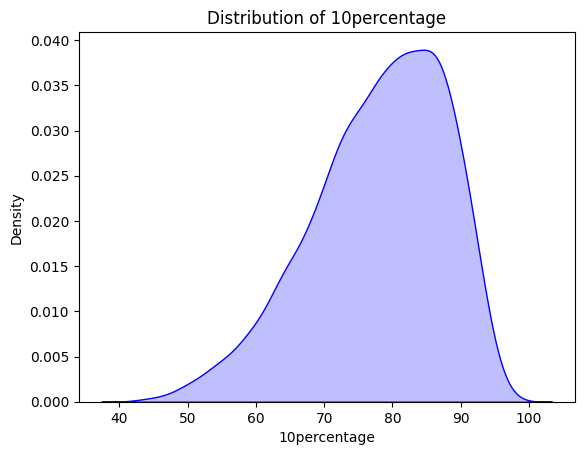

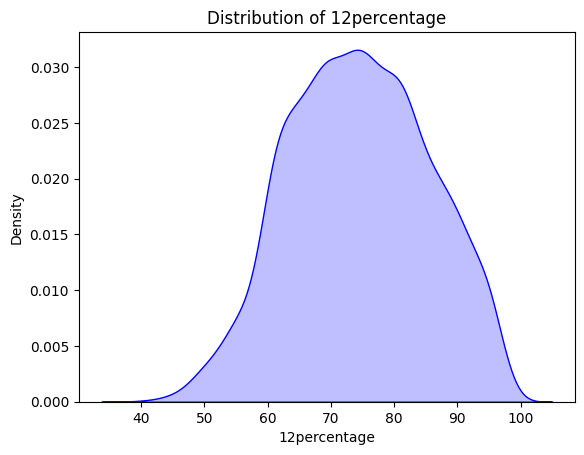

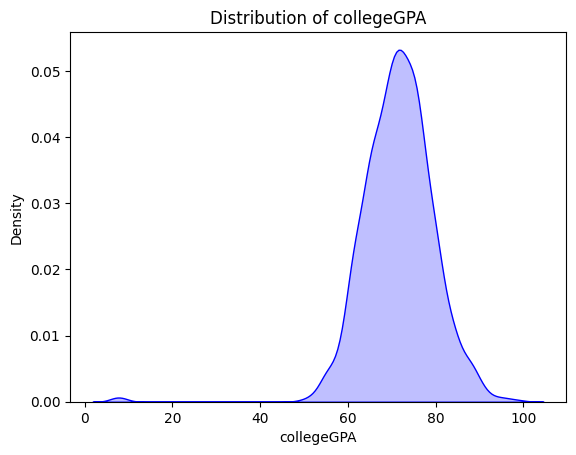

In [30]:
columns_to_plot = ['10percentage', '12percentage', 'collegeGPA']

for column in columns_to_plot:
    sns.kdeplot(df[column], fill=True, color='blue')  
    plt.title(f"Distribution of {column}")  
    plt.xlabel(column)  
    plt.ylabel('Density')  
    plt.show()

students tend to perform similarly in their 10th, 12th, and college years, with most scores concentrated between 60% and 90%, showing a consistent performance across all educational levels.

### Distribution of 10th board, 12th board and Degree 

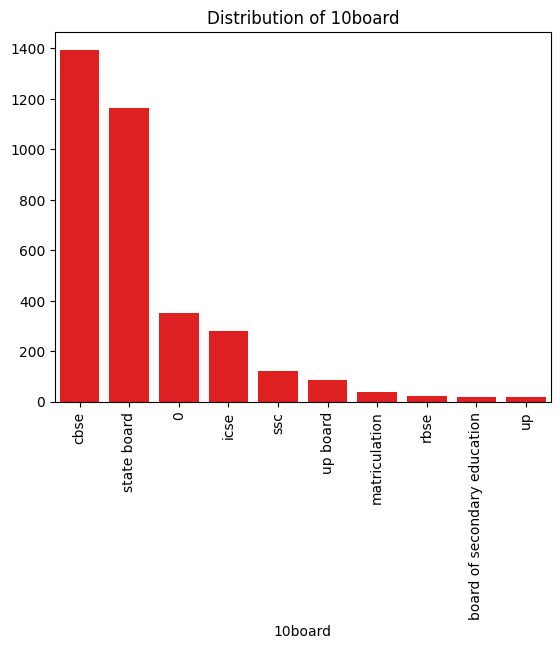

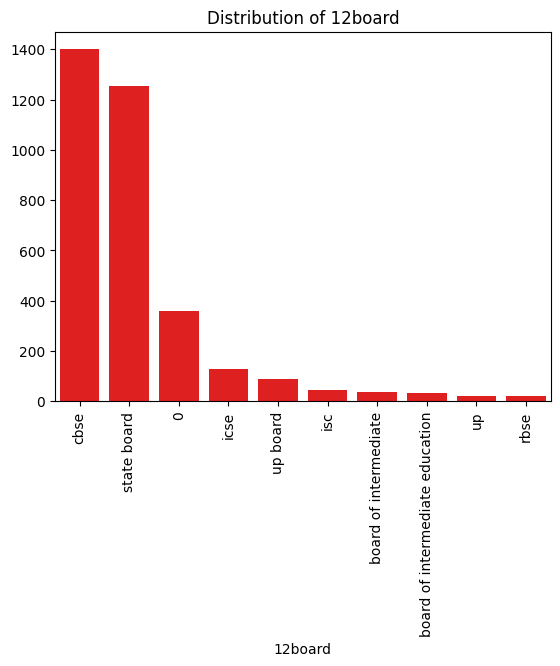

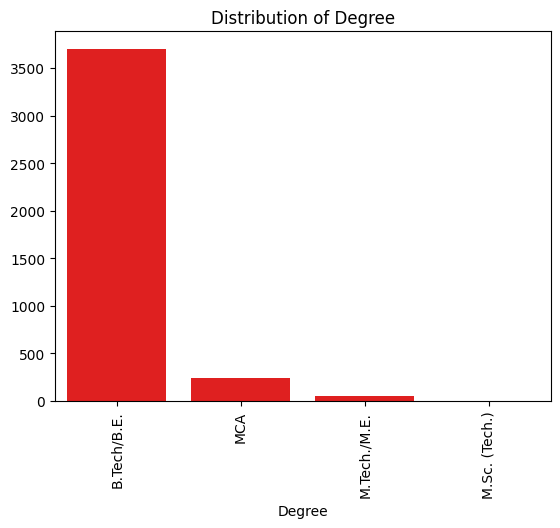

In [31]:

columns_to_plot = ['10board', '12board', 'Degree']

for column in columns_to_plot:
    value_counts = df[column].value_counts()[:10]
    sns.barplot(x=value_counts.index, y=value_counts.values, color='red')  
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=90)
    plt.xlabel(column)
    plt.show()

Most students completed their 10th and 12th in cbse and degree in B.Tech/B.E

## BIVARIATE ANALYSIS

### Salary and Specilaization

In [32]:
specialization_salary = df.groupby('Specialization')['Salary'].mean()
top_specialization_salary = specialization_salary.sort_values(ascending=False)
top_10_specialization_salary = top_specialization_salary.head(10)
top_10_specialization_salary

Specialization
polymer technology                         700000.000000
computer networking                        565000.000000
information science                        460000.000000
instrumentation and control engineering    394000.000000
information & communication technology     387500.000000
industrial & production engineering        384500.000000
civil engineering                          381206.896552
computer engineering                       374100.000000
industrial engineering                     370000.000000
chemical engineering                       370000.000000
Name: Salary, dtype: float64

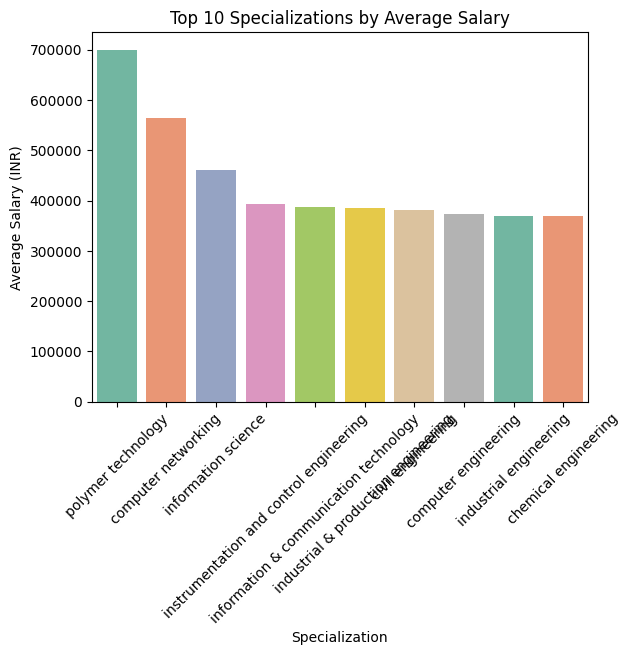

In [33]:
sns.barplot(x=top_10_specialization_salary.index, 
            y=top_10_specialization_salary.values, 
            hue=top_10_specialization_salary.index,
            palette='Set2', 
            dodge=False, 
            legend=False) 
plt.title('Top 10 Specializations by Average Salary')
plt.xlabel('Specialization')
plt.ylabel('Average Salary (INR)')
plt.xticks(rotation=45) 
plt.show()

The top specialization with the highest average salary is Polymer Technology at INR 700,000, followed by Computer Networking at INR 565,000. Specializations like Information Science, Instrumentation and Control Engineering, and Information & Communication Technology also rank highly in terms of average salary.

### Conclusion on the comparison between Top 10 Common Specializations and Top 10 Specializations by Salary


The specializations that are most common among students (like Electronics and Communication Engineering and Computer Science & Engineering) do not offer the highest average salaries. Instead, more niche specializations such as Polymer Technology and Computer Networking tend to have higher average salaries, though they are pursued by fewer students.

### Salary and Designation

In [34]:
Designationn_salary = df.groupby('Designation')['Salary'].mean()
top_Designation_salary = Designationn_salary.sort_values(ascending=False)
top_10_Designation_salary = top_Designation_salary.head(10)
top_10_Designation_salary

Designation
junior manager               1.300000e+06
senior developer             1.110000e+06
data scientist               8.966667e+05
field engineer               8.016667e+05
asst. manager                8.000000e+05
software engineer trainee    7.816667e+05
research scientist           7.300000e+05
branch manager               7.125000e+05
sales account manager        7.100000e+05
technical lead               6.690000e+05
Name: Salary, dtype: float64

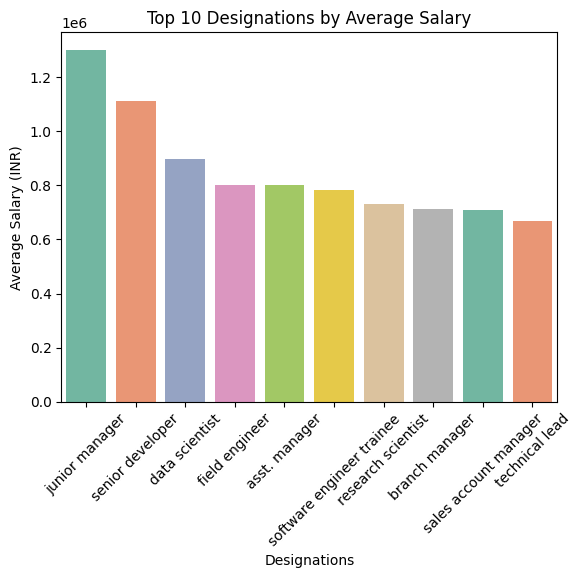

In [35]:
sns.barplot(x=top_10_Designation_salary.index, 
            y=top_10_Designation_salary.values, 
            hue=top_10_Designation_salary.index, 
            palette='Set2', 
            dodge=False, 
            legend=False) 
plt.title('Top 10 Designations by Average Salary')
plt.xlabel('Designations')
plt.ylabel('Average Salary (INR)')
plt.xticks(rotation=45) 
plt.show()

Junior Manager is paid more comparing to other job roles

### CollegeGPA vs Salary

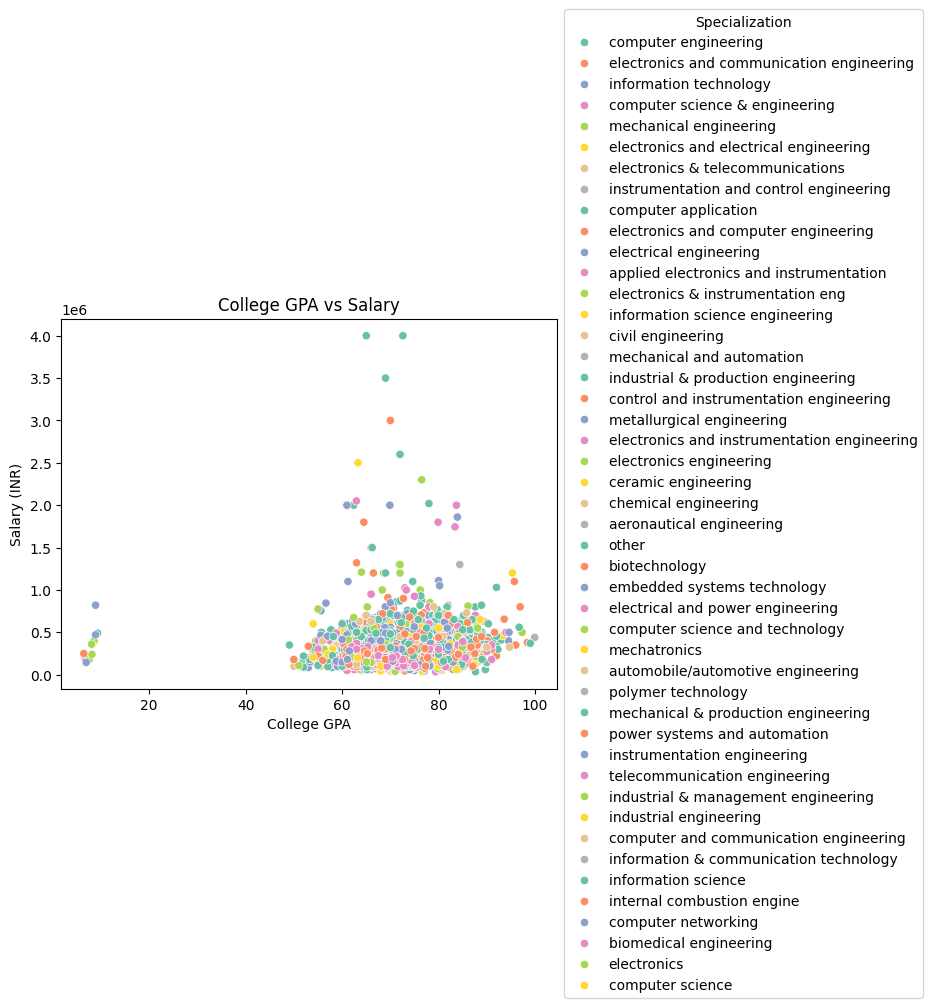

In [36]:
sns.scatterplot(x='collegeGPA', y='Salary', data=df, hue='Specialization', palette='Set2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Specialization')
plt.title('College GPA vs Salary')
plt.xlabel('College GPA')
plt.ylabel('Salary (INR)')
plt.show()

From the scatter plot, there is no strong linear relationship between College GPA and Salary. Students with various GPA scores seem to receive a wide range of salaries, suggesting that factors other than GPA might play a bigger role in determining salary.

### Personal skillset vs salary

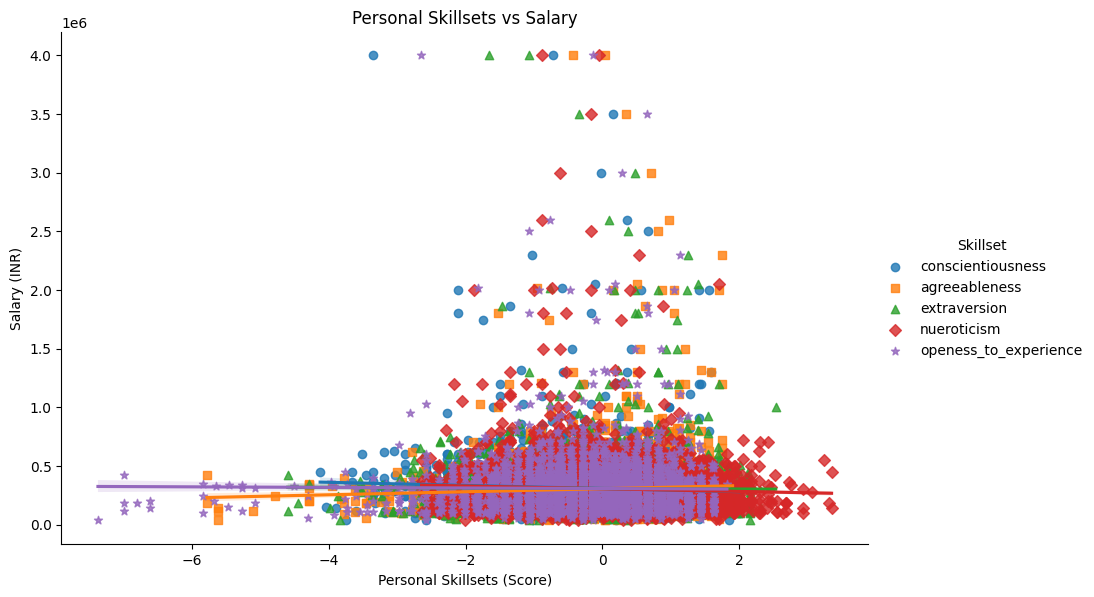

In [37]:
df_melted = pd.melt(df, id_vars=['Salary'], 
                    value_vars=['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience'],
                    var_name='Skillset', value_name='Score')

# Scatter plot with regression lines for each personal skillset
sns.lmplot(x='Score', y='Salary', hue='Skillset', data=df_melted, height=6, aspect=1.5, markers=['o', 's', '^', 'D', '*'])

plt.title('Personal Skillsets vs Salary')
plt.xlabel('Personal Skillsets (Score)')
plt.ylabel('Salary (INR)')
plt.show()

From the plot, it is evident that there is no strong linear relationship between any of the personal skillset scores (conscientiousness, agreeableness, extraversion, neuroticism, and openness to experience) and Salary. The data points are spread out across the plot without showing a clear upward or downward trend.

### Analyzing the relationship between Gender and Specialization

In [38]:
gender_specialization = pd.crosstab(df['Gender'], df['Specialization'],normalize ='index')
gender_specialization

Specialization,aeronautical engineering,applied electronics and instrumentation,automobile/automotive engineering,biomedical engineering,biotechnology,ceramic engineering,chemical engineering,civil engineering,computer and communication engineering,computer application,...,internal combustion engine,mechanical & production engineering,mechanical and automation,mechanical engineering,mechatronics,metallurgical engineering,other,polymer technology,power systems and automation,telecommunication engineering
Gender,,,,,,,,,,,,,,,,,,,,,
f,0.001045,0.002090,0.000000,0.00209,0.009404,0.000000,0.001045,0.006270,0.000000,0.061651,...,0.000000,0.000000,0.000000,0.010449,0.001045,0.000000,0.000000,0.000000,0.000000,0.001045
m,0.000658,0.002302,0.001644,0.00000,0.001973,0.000329,0.002631,0.007563,0.000329,0.060835,...,0.000329,0.000329,0.001644,0.062808,0.000987,0.000658,0.004275,0.000329,0.000329,0.001644


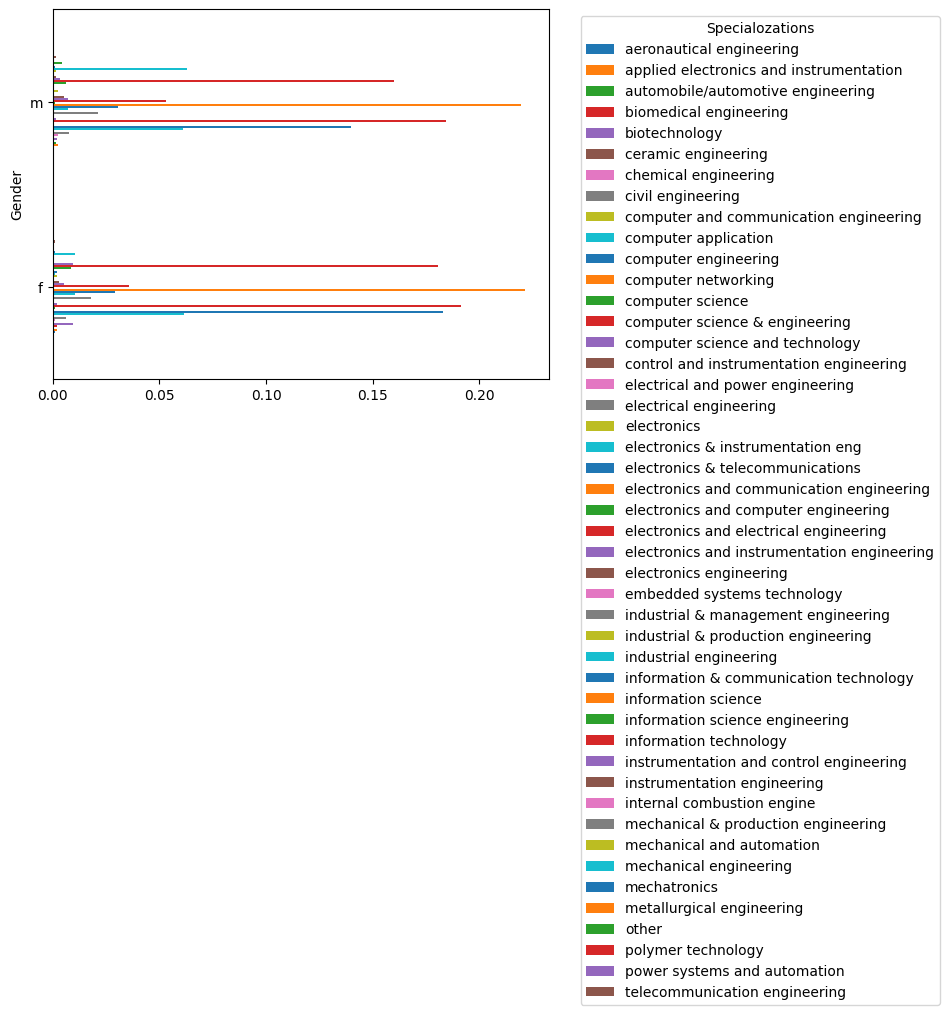

In [39]:
gender_specialization.plot(kind='barh')
plt.legend(title='Specialozations', bbox_to_anchor=(1.05, 1), loc='upper left')

In [40]:
# Get the top 2 specializations for Male
top_2_male_specializations = gender_specialization.loc['m'].sort_values(ascending=False).head(2)

# Get the top 2 specializations for Female
top_2_female_specializations = gender_specialization.loc['f'].sort_values(ascending=False).head(2)

# Display the results
print("Top 2 Specializations for Males:")
print(top_2_male_specializations)

print("\nTop 2 Specializations for Females:")
print(top_2_female_specializations)

Top 2 Specializations for Males:
Specialization
electronics and communication engineering    0.219665
computer science & engineering               0.184479
Name: m, dtype: float64

Top 2 Specializations for Females:
Specialization
electronics and communication engineering    0.221526
computer science & engineering               0.191223
Name: f, dtype: float64


 it is clear that Electronics and Communication Engineering is the most popular specialization for both genders, with 21.97% of males and 22.15% of females opting for it. The second most popular choice is Computer Science & Engineering, which is chosen by 18.45% of males and 19.12% of females. These findings indicate that both genders have a similar preference for these technical specializations.

### Analyzing the relationship between Degree and Designations

In [41]:
degree_designation = pd.crosstab(df['Degree'], df['Designation'])
degree_designation

Designation,.net developer,.net web developer,account executive,account manager,admin assistant,administrative coordinator,administrative support,aircraft technician,android developer,application developer,...,ux designer,visiting faculty,web application developer,web designer,web designer and joomla administrator,web designer and seo,web developer,web intern,website developer/tester,windows systems administrator
Degree,,,,,,,,,,,,,,,,,,,,,
B.Tech/B.E.,29,3,4,1,2,1,0,1,39,46,...,2,1,4,7,1,1,48,1,1,1
M.Sc. (Tech.),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
M.Tech./M.E.,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
MCA,4,1,0,0,0,0,1,0,7,5,...,0,0,2,2,0,0,6,0,0,0


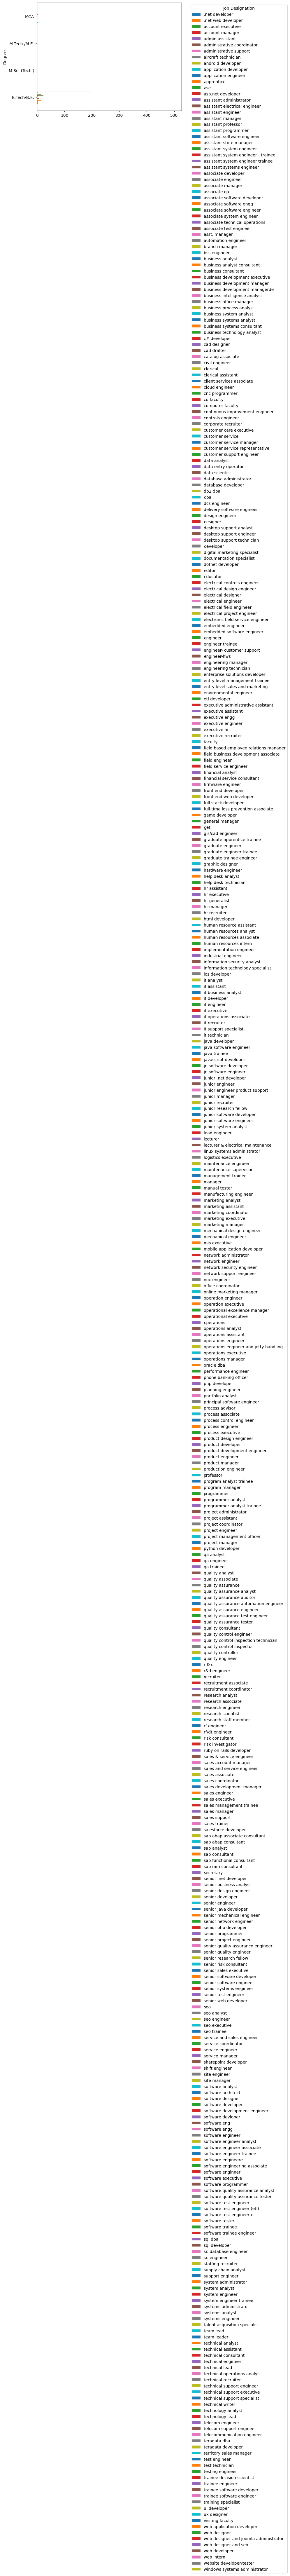

In [42]:
degree_designation.plot(kind='barh')
plt.legend(title='Job Designation', bbox_to_anchor=(1.05, 1), loc='upper left')

In [43]:
for degree in degree_designation.index:
    top_2_designations = degree_designation.loc[degree].sort_values(ascending=False).head(2)
    print(f"Top 2 Designations for {degree}:")
    print(top_2_designations)
    print()

Top 2 Designations for B.Tech/B.E.:
Designation
software engineer     502
software developer    226
Name: B.Tech/B.E., dtype: int64

Top 2 Designations for M.Sc. (Tech.):
Designation
programmer           1
software engineer    1
Name: M.Sc. (Tech.), dtype: int64

Top 2 Designations for M.Tech./M.E.:
Designation
software engineer      7
assistant professor    4
Name: M.Tech./M.E., dtype: int64

Top 2 Designations for MCA:
Designation
software developer    38
software engineer     29
Name: MCA, dtype: int64



The analysis of job designations across different degrees reveals that B.Tech/B.E. graduates overwhelmingly secure roles as Software Engineers (502 placements) and Software Developers (226 placements), indicating a strong trend towards software-related careers. Similarly, MCA graduates also favor software positions, with Software Developer (38 placements) and Software Engineer (29 placements) being the top roles. For M.Tech./M.E. graduates, the most common job is Software Engineer (7 placements), followed by Assistant Professor (4 placements), suggesting a mix of technical and academic career paths. M.Sc. (Tech.) graduates show limited placements, with both Programmer and Software Engineer roles having 1 placement each. Overall, software roles dominate across these degrees, particularly for B.Tech/B.E. and MCA graduates.

## Research Questions

#### Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.


In [46]:
cs_jobs = df[(df['Specialization'] == 'computer engineering') & 
             (df['Designation'].isin(['rogrammer analyst', 'software engineer', 'system engineer', 'trainee engineer']))]

cs_job_salaries = cs_jobs['Salary']

pop_mean = 275000

# Performing a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(cs_job_salaries, pop_mean)


print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("We reject the null hypothesis. The mean salary is significantly different from 2.75 lakhs.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference between the mean salary and 2.75 lakhs.")


T-statistic: 8.362945507167694
P-value: 4.164450808953719e-14
We reject the null hypothesis. The mean salary is significantly different from 2.75 lakhs.


Which means the article is wrong by testing with the data

#### Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)


In [48]:
from scipy.stats import chi2_contingency
tab = pd.crosstab(df['Gender'], df['Specialization'])

# Performing the Chi-Square test of independence
chi2_stat, p_val, dof, expected = stats.chi2_contingency(tab)

# Display the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")

# Conclusion
if p_val < 0.05:
    print("We reject the null hypothesis. There is a significant relationship between Gender and Specialization.")
else:
    print("We fail to reject the null hypothesis. There is no significant relationship between Gender and Specialization.")


Chi-Square Statistic: 104.46891913608455
P-value: 1.2453868176976918e-06
We reject the null hypothesis. There is a significant relationship between Gender and Specialization.


This means we have strong evidence to conclude that gender and specialization are not independent, i.e., the choice of specialization is influenced by gender.

 #### Does the College Tier Influence the Starting Salary?

In [49]:
print(df['CollegeTier'].unique())

[2 1]


In [50]:
tier_1_salaries = df[df['CollegeTier'] == 1]['Salary']
tier_2_salaries = df[df['CollegeTier'] == 2]['Salary']

# Perform a two-sample t-test to compare the mean salaries
t_statistic, p_value = stats.ttest_ind(tier_1_salaries, tier_2_salaries)

# Display the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("We reject the null hypothesis. College Tier has a significant influence on starting salary.")
else:
    print("We fail to reject the null hypothesis. College Tier does not significantly influence starting salary.")


T-statistic: 11.523091562695415
P-value: 3.0182471444274503e-30
We reject the null hypothesis. College Tier has a significant influence on starting salary.


The t-test results indicate that there is a significant difference in starting salaries between College Tier 1 and College Tier 2 graduates. With a T-statistic of 11.52 and a p-value of 3.02e-30 (much smaller than 0.05), we reject the null hypothesis. This means that College Tier has a strong influence on starting salary, suggesting that graduates from higher-tier colleges (Tier 1) tend to earn significantly different starting salaries compared to graduates from lower-tier colleges (Tier 2).

## CONCLUSION

This analysis helps identify key factors influencing the career outcomes of engineering graduates. Specialization plays a crucial role, with Electronics and Communication being the most popular choice, and roles like Junior Manager and Senior Developer offering the highest salaries. Graduates from Tier 1 colleges enjoy significantly better salary prospects compared to their Tier 2 counterparts. The data also reveals that gender impacts specialization choices. These insights provide valuable guidance for students in career planning and help institutions refine their education strategies for better employment outcomes.